# Compra ações por volatilidade

Análise de compra de ações com mais de 5% de participação na Bovespa

In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import date, timedelta
import numpy as np

In [2]:
dfs = {} 
#stocks = ['PETR3.SA', 'VALE3.SA', 'BBDC3.SA', 'ITUB3.SA', 'BBAS3.SA', 'SANB3.SA', 'ABEV3.SA', 'ELET3.SA', 'VIVT3.SA', 'ITSA3.SA', 'TEFC11.SA', 'JBSS3.SA', 'AMBV3.SA']
stocks = ['PETR3.SA', 'VALE3.SA', 'BBDC3.SA', 'ITUB3.SA', 'BBAS3.SA', 'SANB3.SA', 'ABEV3.SA']
for stock in stocks:
  df = web.DataReader(stock, 'yahoo', date.today() - timedelta(days=380), date.today())
  dfs[stock] = df
#for stock, df in dfs.items():
  #print(df.tail())

In [3]:
for stock, df in dfs.items():
  
  #Calculate Bollinger Bands Values
  df['20 Day MA'] = df['Close'].rolling(window=20).mean()
  df['20 Day STD'] = df['Close'].rolling(window=20).std() 

  df['Vol'] =  df['Close'].rolling(21).std(ddof=0)

  df['VolM'] = df['Close'].rolling(21).std(ddof=0).rolling(21).mean()
      
  df['Upper'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
  df['Lower'] = df['20 Day MA'] - (df['20 Day STD'] * 2)

  dfs[stock] = df

In [ ]:
for stock, df in dfs.items():
  
  df = df[20:]

  #Set the buy and sell conditions
  df['B'] =  ((df['Vol'] <=  df['VolM']) & (df['Vol'].shift(periods=1) >  df['VolM'].shift(periods=1)) & (df['Close'] <  df['20 Day MA'])  )
  df = df.assign(Buy=np.where(df['B'] , df['Close'], float("NaN")))

  df['S'] =  ((df['Vol'] >=  df['VolM'])  & (df['Vol'].shift(periods=1) <  df['VolM'].shift(periods=1))  & (df['Close'] >  df['20 Day MA'])  )
  df = df.assign(Sell=np.where(df['S'] , df['Close'], float("NaN")))
  
  dfs[stock] = df

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15, 12))

Comprar no ponto e sair da operação no ponto, considerando que mercados normalmente se valorizam.

*Buy on the dot and stop operation on the dot, assuming markets usually are bullish.*



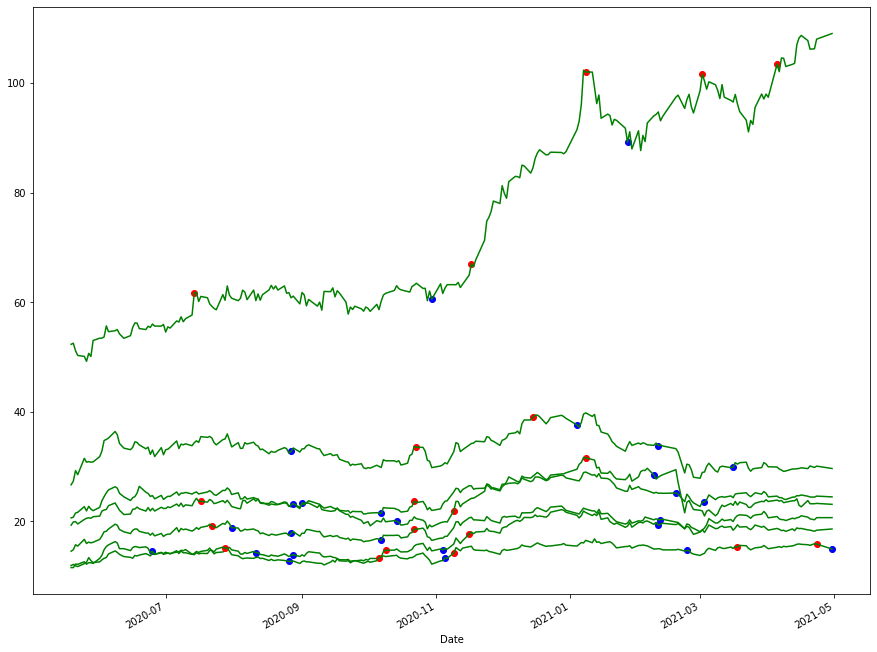

In [6]:
for stock, df in dfs.items():
  df['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
  df['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
  df['Close'].plot(label='Close', color='g')

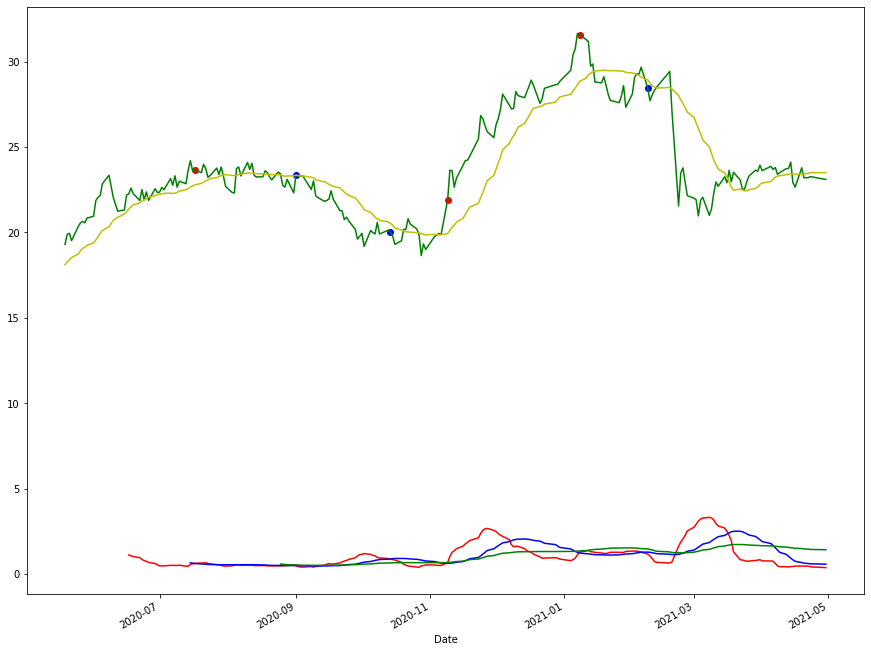

In [7]:
stockEx = "PETR3.SA"
dfs[stockEx]['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
dfs[stockEx]['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
dfs[stockEx]['Close'].plot(label='Close', color='g')
dfs[stockEx]['20 Day MA'].plot(label='Close', color='y')
dfs[stockEx]['Close'].rolling(21).std(ddof=0).plot(label='Close', color='r')
dfs[stockEx]['Close'].rolling(21).std(ddof=0).rolling(21).mean().plot(label='Close', color='b')
dfs[stockEx]['Close'].rolling(21).std(ddof=0).rolling(50).mean().plot(label='Close', color='g')

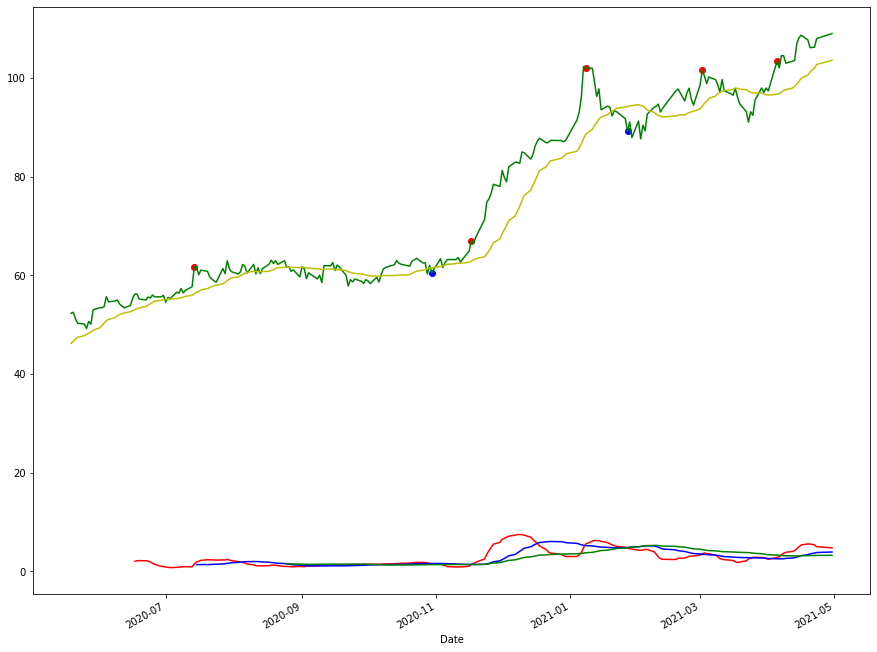

In [8]:
stockEx1 = "VALE3.SA"
dfs[stockEx1]['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
dfs[stockEx1]['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
dfs[stockEx1]['Close'].plot(label='Close', color='g')
dfs[stockEx1]['20 Day MA'].plot(label='Close', color='y')
dfs[stockEx1]['Close'].rolling(21).std(ddof=0).plot(label='Close', color='r')
dfs[stockEx1]['Close'].rolling(21).std(ddof=0).rolling(21).mean().plot(label='Close', color='b')
dfs[stockEx1]['Close'].rolling(21).std(ddof=0).rolling(50).mean().plot(label='Close', color='g')

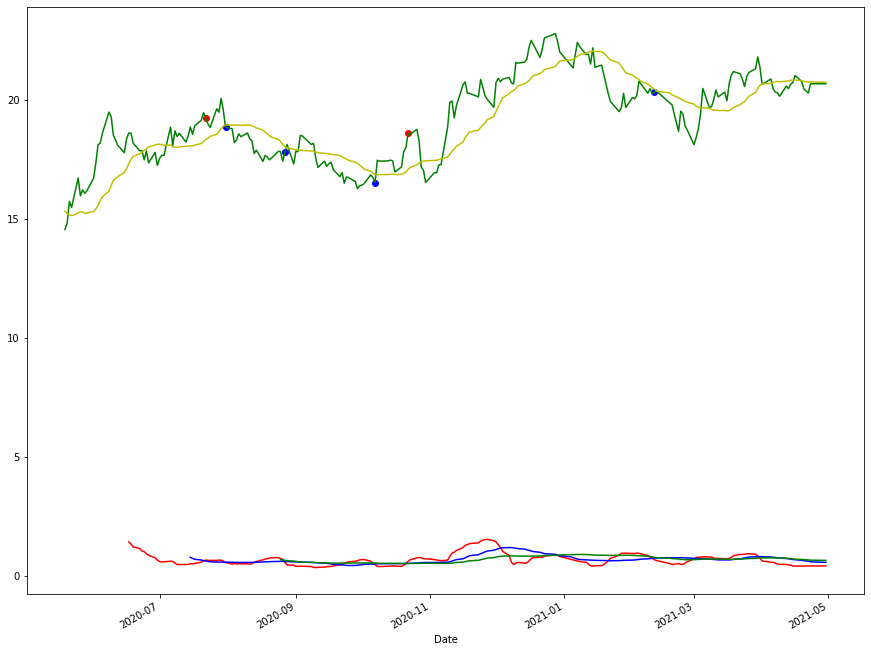

In [9]:
stockEx2 = "BBDC3.SA"
dfs[stockEx2]['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
dfs[stockEx2]['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
dfs[stockEx2]['Close'].plot(label='Close', color='g')
dfs[stockEx2]['20 Day MA'].plot(label='Close', color='y')
dfs[stockEx2]['Close'].rolling(21).std(ddof=0).plot(label='Close', color='r')
dfs[stockEx2]['Close'].rolling(21).std(ddof=0).rolling(21).mean().plot(label='Close', color='b')
dfs[stockEx2]['Close'].rolling(21).std(ddof=0).rolling(50).mean().plot(label='Close', color='g')

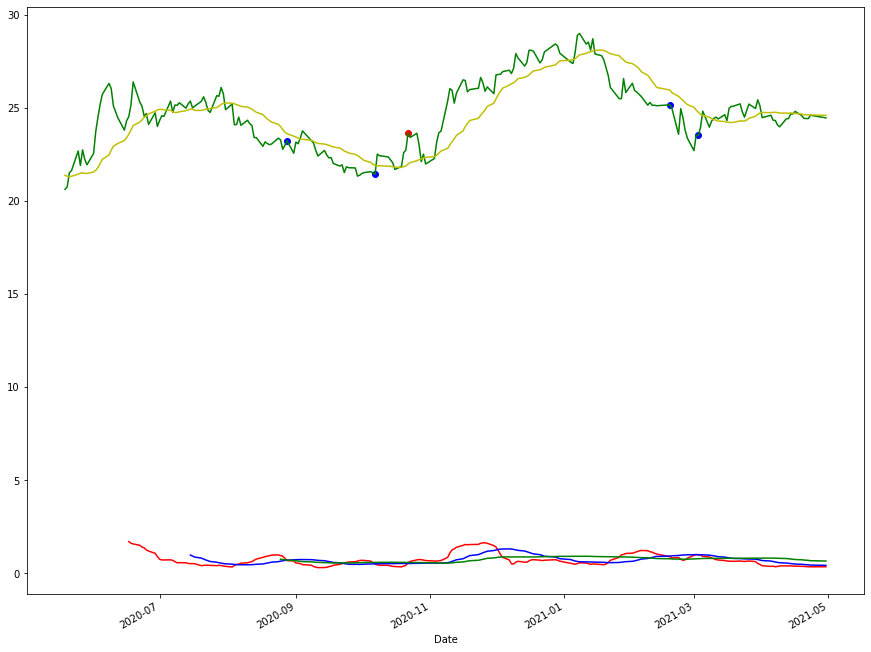

In [10]:
stockEx3 = "ITUB3.SA"
dfs[stockEx3]['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
dfs[stockEx3]['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
dfs[stockEx3]['Close'].plot(label='Close', color='g')
dfs[stockEx3]['20 Day MA'].plot(label='Close', color='y')
dfs[stockEx3]['Close'].rolling(21).std(ddof=0).plot(label='Close', color='r')
dfs[stockEx3]['Close'].rolling(21).std(ddof=0).rolling(21).mean().plot(label='Close', color='b')
dfs[stockEx3]['Close'].rolling(21).std(ddof=0).rolling(50).mean().plot(label='Close', color='g')

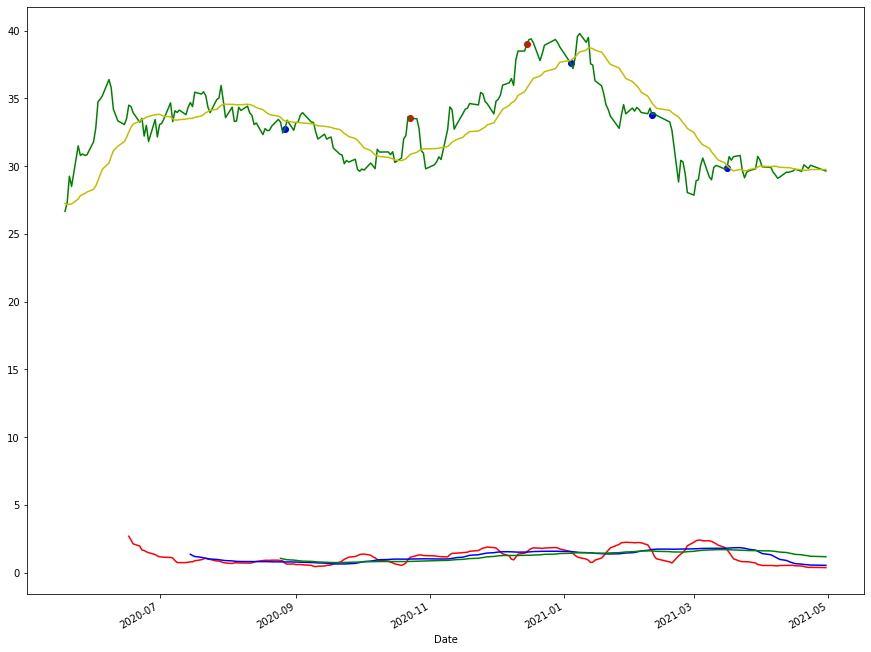

In [11]:
stockEx4 = "BBAS3.SA"
dfs[stockEx4]['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
dfs[stockEx4]['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
dfs[stockEx4]['Close'].plot(label='Close', color='g')
dfs[stockEx4]['20 Day MA'].plot(label='Close', color='y')
dfs[stockEx4]['Close'].rolling(21).std(ddof=0).plot(label='Close', color='r')
dfs[stockEx4]['Close'].rolling(21).std(ddof=0).rolling(21).mean().plot(label='Close', color='b')
dfs[stockEx4]['Close'].rolling(21).std(ddof=0).rolling(50).mean().plot(label='Close', color='g')

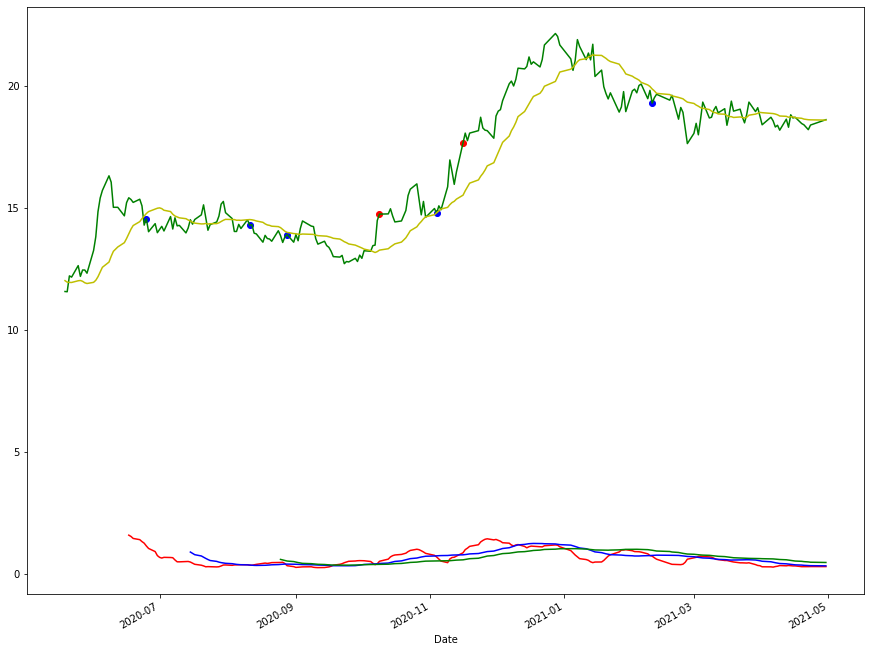

In [12]:
stockEx5 = "SANB3.SA"
dfs[stockEx5]['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
dfs[stockEx5]['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
dfs[stockEx5]['Close'].plot(label='Close', color='g')
dfs[stockEx5]['20 Day MA'].plot(label='Close', color='y')
dfs[stockEx5]['Close'].rolling(21).std(ddof=0).plot(label='Close', color='r')
dfs[stockEx5]['Close'].rolling(21).std(ddof=0).rolling(21).mean().plot(label='Close', color='b')
dfs[stockEx5]['Close'].rolling(21).std(ddof=0).rolling(50).mean().plot(label='Close', color='g')

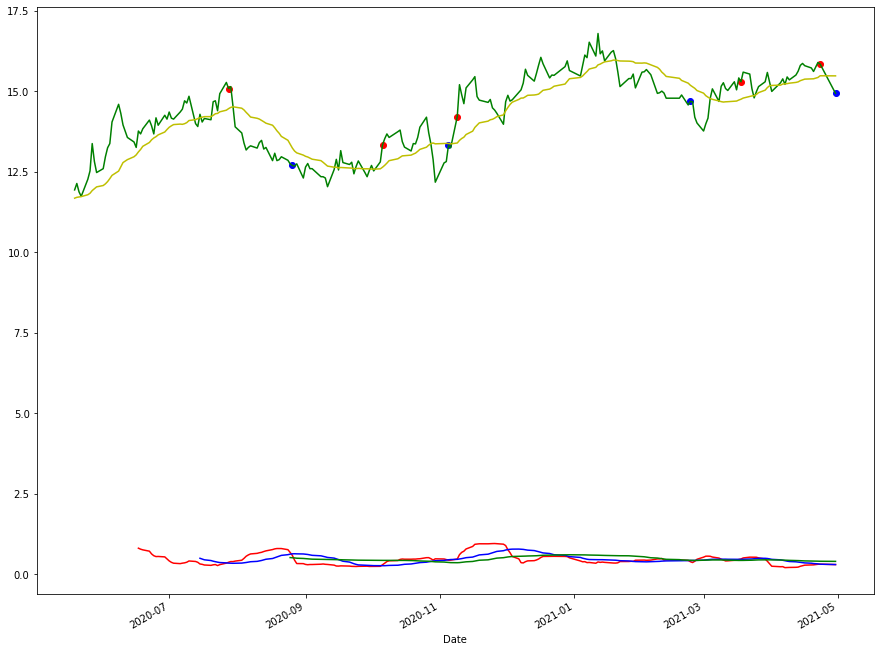

In [13]:
stockEx6 = "ABEV3.SA"
dfs[stockEx6]['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
dfs[stockEx6]['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
dfs[stockEx6]['Close'].plot(label='Close', color='g')
dfs[stockEx6]['20 Day MA'].plot(label='Close', color='y')
dfs[stockEx6]['Close'].rolling(21).std(ddof=0).plot(label='Close', color='r')
dfs[stockEx6]['Close'].rolling(21).std(ddof=0).rolling(21).mean().plot(label='Close', color='b')
dfs[stockEx6]['Close'].rolling(21).std(ddof=0).rolling(50).mean().plot(label='Close', color='g')

In [15]:
#set the operations result dataframe
results = {}

for stock, df in dfs.items():
  op = df[df['B'] | df['S']]
  op = op[op['B'] | op['B'].shift(periods=1)]
  op = pd.concat([op, df.tail(1)])
  op = op[op['B'] != op['B'].shift(periods=1)]
  op['Date'] = op.index
  op['BuyDate'] = op['Date'].shift(periods=1)
  op['BuyValue'] = op['Close'].shift(periods=1)
  op = op.assign(Result=np.where( op['B'] == False & op['B'].shift(periods=1), round(op['Close'] - op['Close'].shift(periods=1), 2), 0))
  op = op.rename(columns={'Date':'StopDate', 'Close' : 'StopValue'})
  op = op[op['B'] == False]
  op = op.assign(Gain=np.where(op['Result'] > 0 , 1, 0))
  op[['BuyValue', 'BuyDate', 'StopValue' , 'StopDate', 'Result']]
  results[stock] = op

results

valor = 0

for stock, df in results.items():
  valor += df['BuyValue'].iloc[0]*100
  print(stock, " compra inicial R$: ", df['BuyValue'].iloc[0]*100, " data: ", df['BuyDate'].iloc[0])
  print(df)

#print(valor)

PETR3.SA  compra inicial R$:  2336.0000610351562  data:  2020-09-01 00:00:00
             High        Low       Open  ...   BuyValue  Result  Gain
Date                                     ...                         
2020-11-09  22.48  21.010000  21.010000  ...  23.360001   -1.46     0
2021-04-30  23.41  22.780001  22.889999  ...  28.450001   -5.35     0

[2 rows x 21 columns]
VALE3.SA  compra inicial R$:  6054.999923706055  data:  2020-10-30 00:00:00
                  High        Low       Open  ...   BuyValue  Result  Gain
Date                                          ...                         
2020-11-17   68.099998  64.800003  64.800003  ...  60.549999    6.42     1
2021-03-02  102.180000  94.940002  97.500000  ...  89.199997   12.40     1

[2 rows x 21 columns]
BBDC3.SA  compra inicial R$:  1884.5500946044922  data:  2020-07-31 00:00:00
                 High        Low   Open  ...   BuyValue  Result  Gain
Date                                     ...                         
2020

In [16]:
print(valor)

18597.550010681152


In [17]:
total = 0
gains = 0
totalOp = 0

for stock, df in results.items():
  total += df['Result'].sum()
  gains += df['Gain'].sum()
  totalOp += df.shape[0]
  print(stock, "%+5.2f" % (df['Result'].sum())," operacoes ", df.shape[0], ", com lucro", df['Gain'].sum())
print("Total R$","%3.2f" % (total), " por ação, cresc: ", round((total*100)/(valor/100.0), 2), "%", " operacoes ", totalOp, "com lucro", gains)

PETR3.SA -6.81  operacoes  2 , com lucro 0
VALE3.SA +18.82  operacoes  2 , com lucro 2
BBDC3.SA +0.09  operacoes  2 , com lucro 1
ITUB3.SA -0.28  operacoes  2 , com lucro 1
BBAS3.SA -7.17  operacoes  2 , com lucro 1
SANB3.SA +2.38  operacoes  3 , com lucro 2
ABEV3.SA +2.14  operacoes  3 , com lucro 3
Total R$ 9.17  por ação, cresc:  4.93 %  operacoes  16 com lucro 10
